* Misbah Sabir
* Batch IV 
* Machine Learning
## <center> Assignment 3 </center>
### <center> SVM Algorithm on Diabetic Patients</center>


In [1]:
# import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm 

In [2]:
# load the dataset
df= pd.read_csv("Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [3]:
# now clean the data
# first we check for the missig values
df.isnull().sum()


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.count()

Id                          2768
Pregnancies                 2768
Glucose                     2768
BloodPressure               2768
SkinThickness               2768
Insulin                     2768
BMI                         2768
DiabetesPedigreeFunction    2768
Age                         2768
Outcome                     2768
dtype: int64

In [6]:
df['Outcome'].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Glucose', ylabel='Age'>

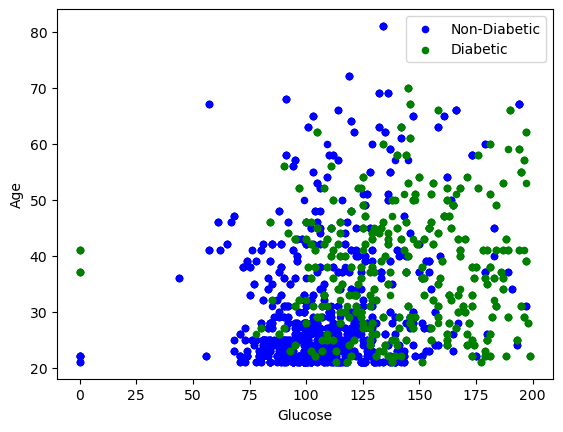

In [7]:
# scatter plot for the Diabetic and Non-Diabetic patients against Age and glucose which shows at what age patients mostly are diabetic
healthy_patient = df[df['Outcome']==0]
diabetic_patient= df[df['Outcome']==1]

axes=healthy_patient.plot(kind='scatter', x='Glucose',y='Age',color='blue',label='Non-Diabetic')

diabetic_patient.plot(kind='scatter', x='Glucose',y='Age',color='green',label='Diabetic',ax=axes)

In [8]:
# now set the values for independent and dependent in to features and label variable (X, y)
X =np.array(df.drop('Outcome',axis=1)) # for features we drop the outcome which later saved in y
y = df['Outcome'] #target
X[0:5]

array([[1.000e+00, 6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00,
        3.360e+01, 6.270e-01, 5.000e+01],
       [2.000e+00, 1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00,
        2.660e+01, 3.510e-01, 3.100e+01],
       [3.000e+00, 8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00,
        2.330e+01, 6.720e-01, 3.200e+01],
       [4.000e+00, 1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01,
        2.810e+01, 1.670e-01, 2.100e+01],
       [5.000e+00, 0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02,
        4.310e+01, 2.288e+00, 3.300e+01]])

In [9]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [10]:
#now split the data in to Taining and testing data 
# 0.3 shows that 30% data is for testing whereas 70% data is for training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#1937*9 rows
X_train.shape

#1937*1
y_train.shape #(total training transactions)

#831*9 rows
X_test.shape

#831, 1
y_test.shape #(total testing Transactions)


(831,)

### Support Vector Machine 
* support vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis
<b> four</b> types of kernal supported by the SVM
* linear
* polynomial
* Radial basis function (RBF) (defaulted)
* sigmoid
-- <b>Gamma:</b> it is the kernal coeffcient, which is a parameter that determines the width of the kernel function
-- <b> C: </b> C is a regularization parameter that controls the trade-off between achieving a good fit to the training data and a simple decision boundary.


In [21]:

from sklearn.svm import SVC
svm_model = SVC(kernel='linear',gamma='auto',C=2)
#svm_model = SVC(kernel='linear')



In [44]:
svm_model.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [45]:
y_pred= svm_model.predict(X_test) 

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       562
           1       0.70      0.55      0.61       269

    accuracy                           0.78       831
   macro avg       0.75      0.72      0.73       831
weighted avg       0.77      0.78      0.77       831



In [47]:
#now check the accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.776173285198556


In [48]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Precision: 0.6966824644549763
Recall: 0.5464684014869888


In [63]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc

confusion = confusion_matrix(y_test, y_pred)
confusion

array([[498,  64],
       [122, 147]], dtype=int64)

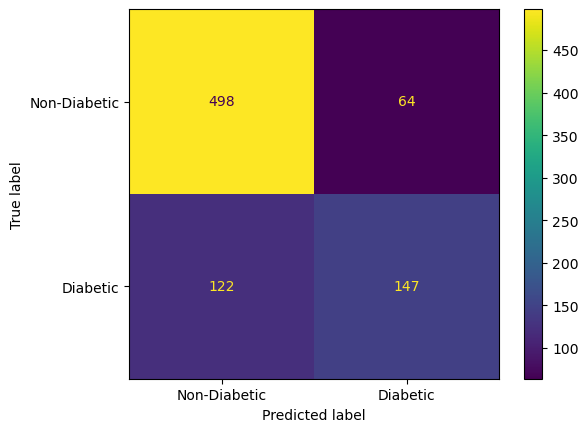

In [66]:
#plot the confusion matrix
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels = ['Non-Diabetic','Diabetic'])
matrix.plot()

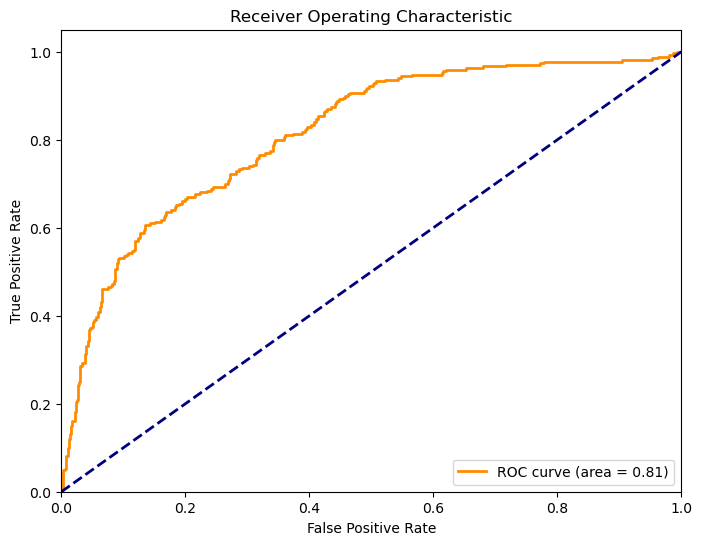

In [51]:
#Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()